# Tutorial 4: FANTASY

The FANTASY package was installed based on the tutorial provided on https://fantasyagn.readthedocs.io/en/latest/ by:

pip install fantasy_agn

in a conda environment with Python 3.10.

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

import numpy as np
import pandas as pd

import glob

In [2]:
from fantasy_agn.tools import read_sdss, read_text, read_gama_fits

from fantasy_agn.models import create_input_folder
from fantasy_agn.models import create_feii_model, create_model, create_tied_model, continuum, create_line, create_fixed_model

Selected a type 1 AGN from SDSS– e.g. DR16, Lyke et al. 2020:

https://dr16.sdss.org/optical/spectrum/view?id=400475&plate=6498&mjd=56565&fiberid=898

In [3]:
s = read_sdss('spec-6498-56565-0898.fits')

Running the Fantasy general tutorial on this object:

In [4]:
# Dust and redshift correction
s.DeRedden()
s.CorRed()

In [5]:
s.fit_host_sdss(mask_host=True, custom=False)

Host contribution is negliglable


In [8]:
s.crop(4000, 8000)

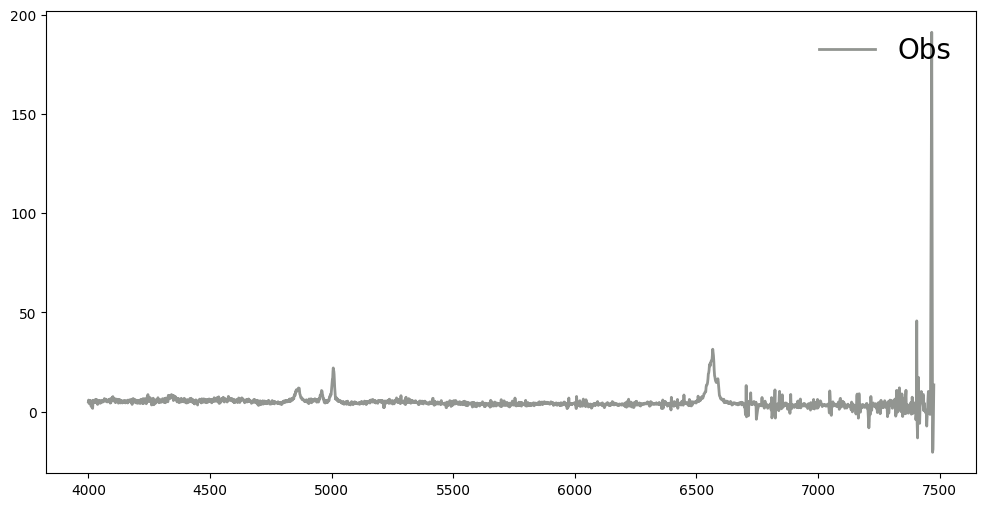

In [9]:
plt.style.context(['nature', 'notebook'])
plt.figure(figsize=(12,6))
plt.plot(s.wave, s.flux, color="#929591", label='Obs', lw=2)
plt.legend(loc='upper right',  prop={'size': 20}, frameon=False, ncol=2);

In [19]:
xmin = s.wave.min()
xmax = s.wave.max()

create_input_folder(xmin=xmin,xmax=xmax, path_to_folder='liness/')

Directory  liness/  already exists


In [11]:
cont=continuum(s,min_refer=5690, refer=5700, max_refer=5710)
broad=create_fixed_model(['hydrogen.csv'], name='br')
he=create_fixed_model(['helium.csv'], name='he',fwhm=3000, min_fwhm=1000, max_fwhm=5000)
narrow=create_tied_model(name='OIII5007',files=['narrow_basic.csv','hydrogen.csv'],prefix='nr', fwhm=1000,min_offset=0, max_offset=300, min_fwhm=900, max_fwhm=1200,fix_oiii_ratio=True, position=5006.803341, included=True,min_amplitude=0.2)
fe=create_feii_model(name='feii', fwhm=1800, min_fwhm=1000, max_fwhm=2000, offset=0, min_offset=-3000, max_offset=3000)

model = cont+broad+narrow+fe+he

In [12]:
s.fit(model, ntrial=2)

stati 59997.317935424115
1 iter stat:  71.87178208731711
2 iter stat:  52.15035964857816


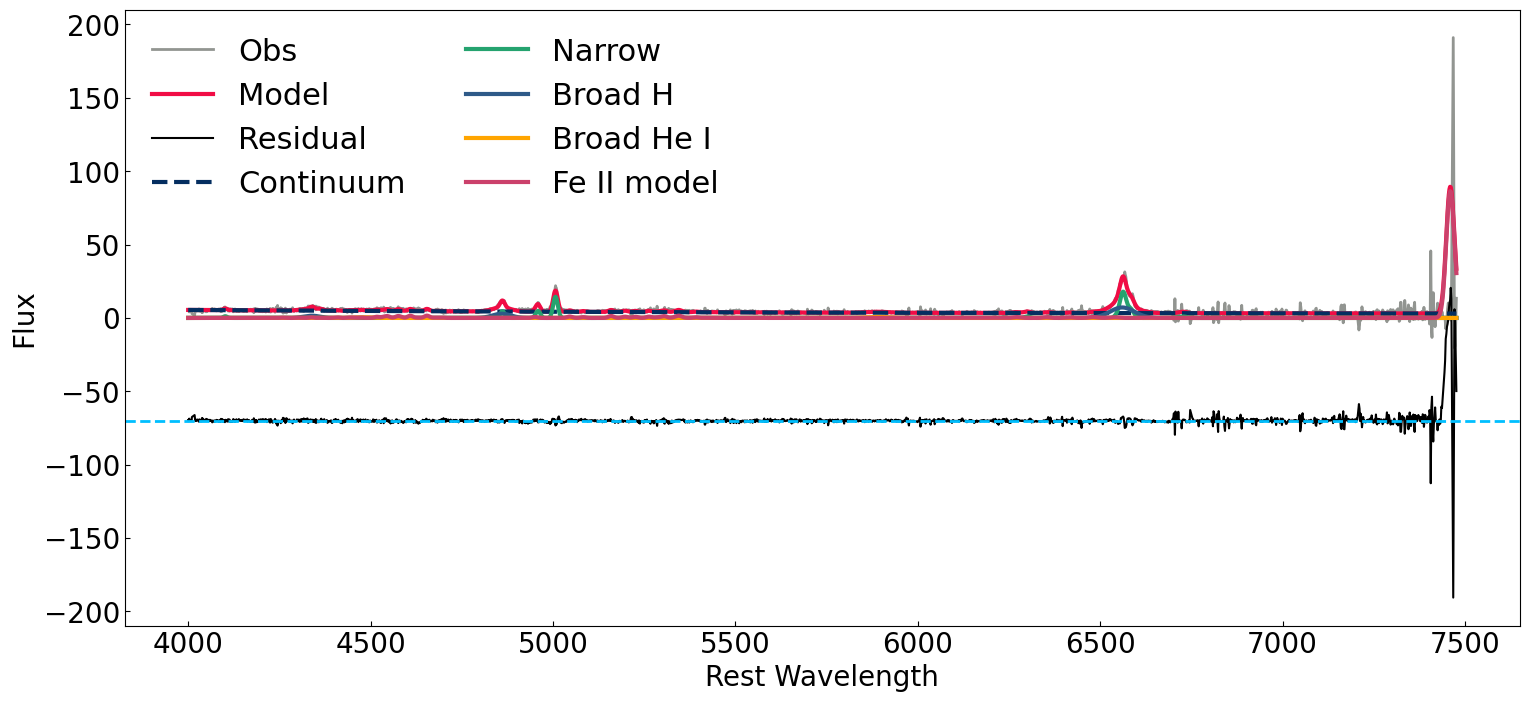

In [18]:
plt.style.context(['nature', 'notebook'])
plt.figure(figsize=(18,8))
plt.plot(s.wave, s.flux, color="#929591", label='Obs', lw=2)
plt.plot(s.wave, model(s.wave), color="#F10C45",label='Model',lw=3)
plt.plot(s.wave, model(s.wave)-s.flux-70, '-',color="black", label='Residual', lw=1.5)
plt.axhline(y=-70, color='deepskyblue', linestyle='--', lw=2)

plt.plot(s.wave, cont(s.wave),'--',color="#042E60",label='Continuum', lw=3)
plt.plot(s.wave, narrow(s.wave),label='Narrow',color="#25A36F",lw=3)
plt.plot(s.wave, broad(s.wave), label='Broad H', lw=3, color="#2E5A88")
plt.plot(s.wave, he(s.wave), label='Broad He I', lw=3, color="orange")
plt.plot(s.wave, fe(s.wave),'-',color="#CB416B",label='Fe II model', lw=3)

plt.xlabel('Rest Wavelength',fontsize=20)
plt.ylabel('Flux',fontsize=20)
#plt.xlim(4000,7000)
#plt.ylim(-150,900)
plt.tick_params(which='both', direction="in")
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(prop={'size': 22}, frameon=False, ncol=2)

plt.savefig('fantasy_fit.pdf')


In [15]:
# Integrate total FeII model,
flux_feII=np.sum(fe(s.wave))
print("FeII total flux =",flux_feII)

# Mask the wavelength range of interess (e.g. Ha line) and integrate broad component.
x=s.wave
mask_ha=(x>6300)&(x<6700)
Ha_broad=np.sum(broad(s.wave)[mask_ha])
print("Ha_broad =",Ha_broad)

FeII total flux = 1711.0864
Ha_broad = 390.27618
